In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score

In [3]:
df = pd.read_csv('cleaned_data_2.csv')

In [4]:
df.drop('Unnamed: 0', axis =1, inplace=True)

In [5]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
4,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6825 entries, 0 to 6824
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   float64
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(10), object(6)
memory usage: 853.2+ KB


#### Distribution Check by Platform, Genre, and Developer

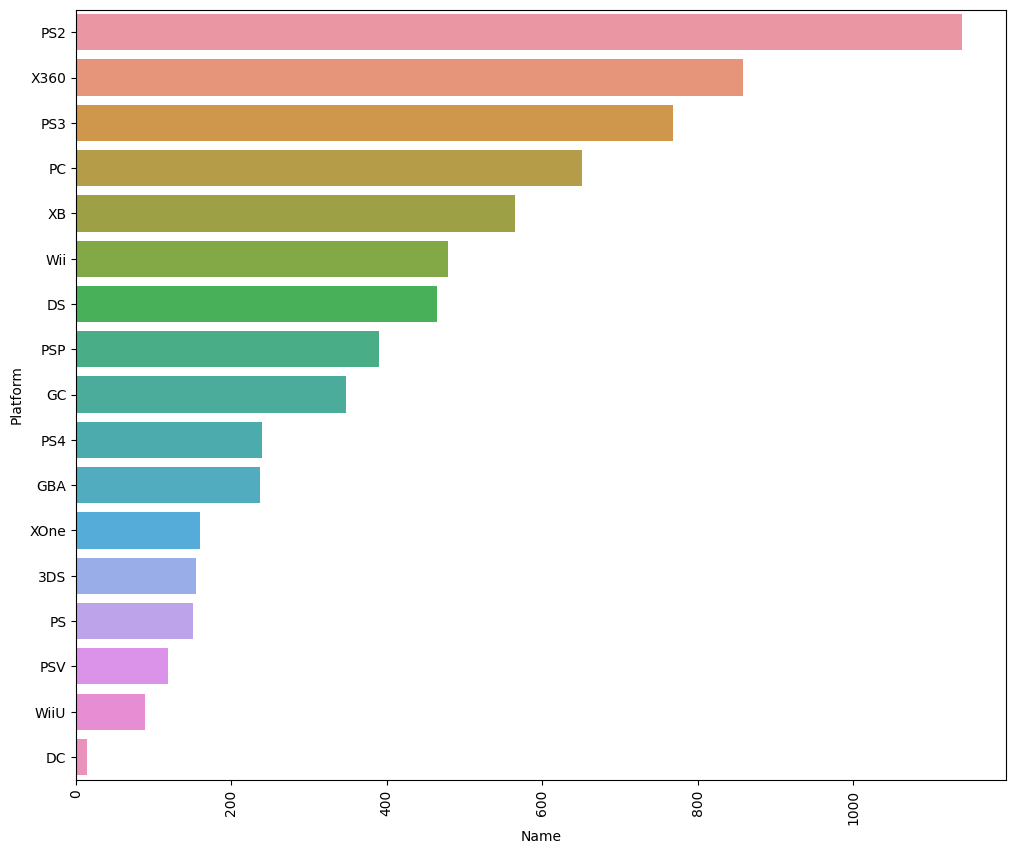

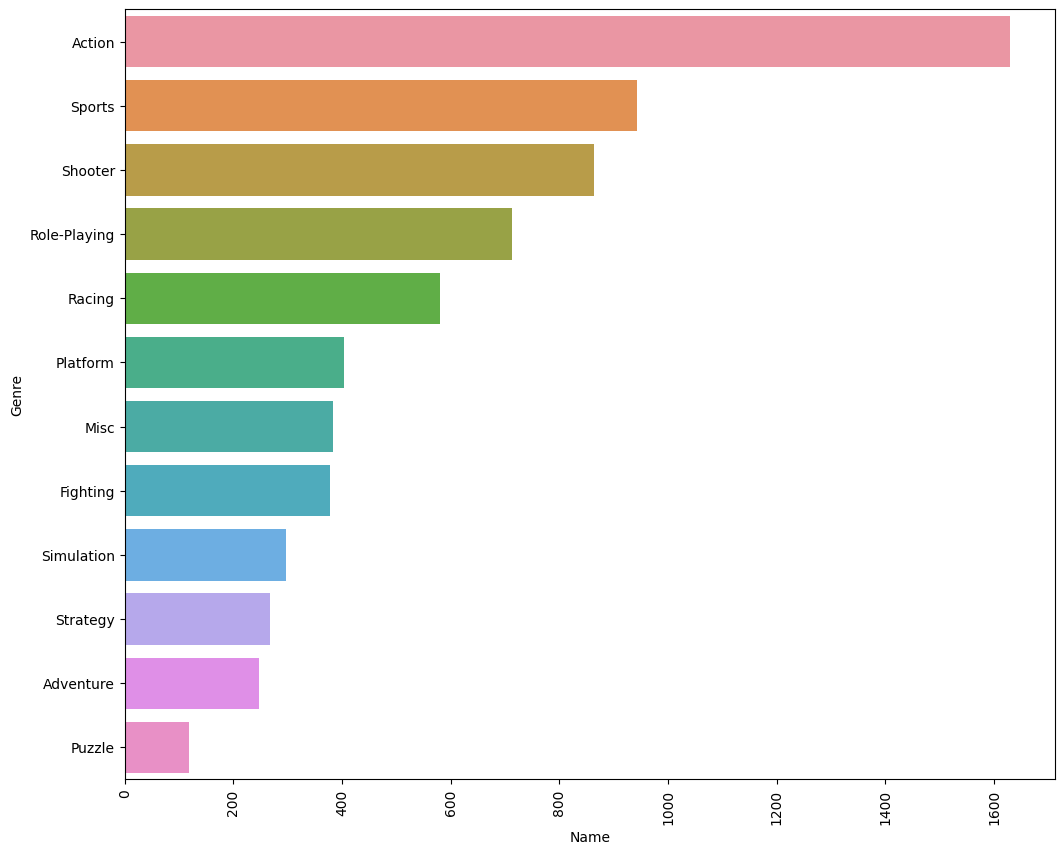

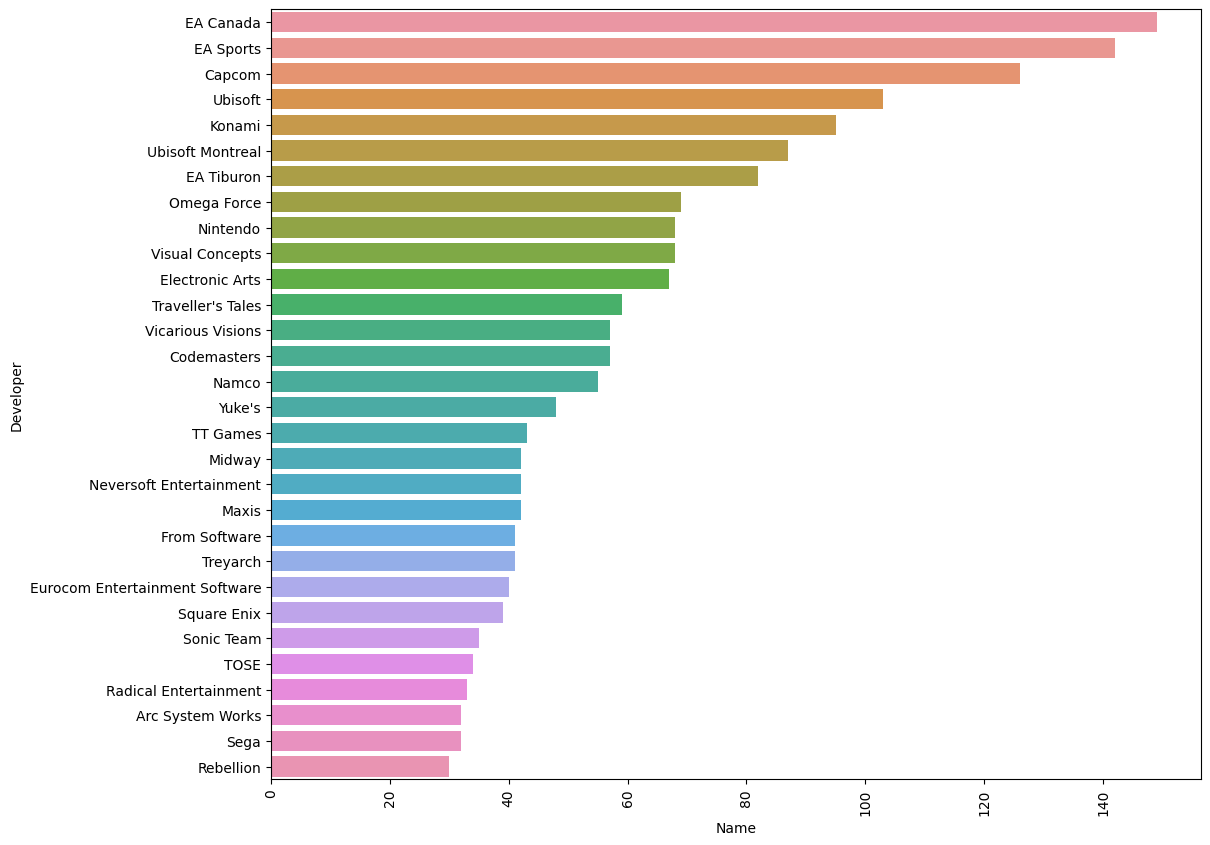

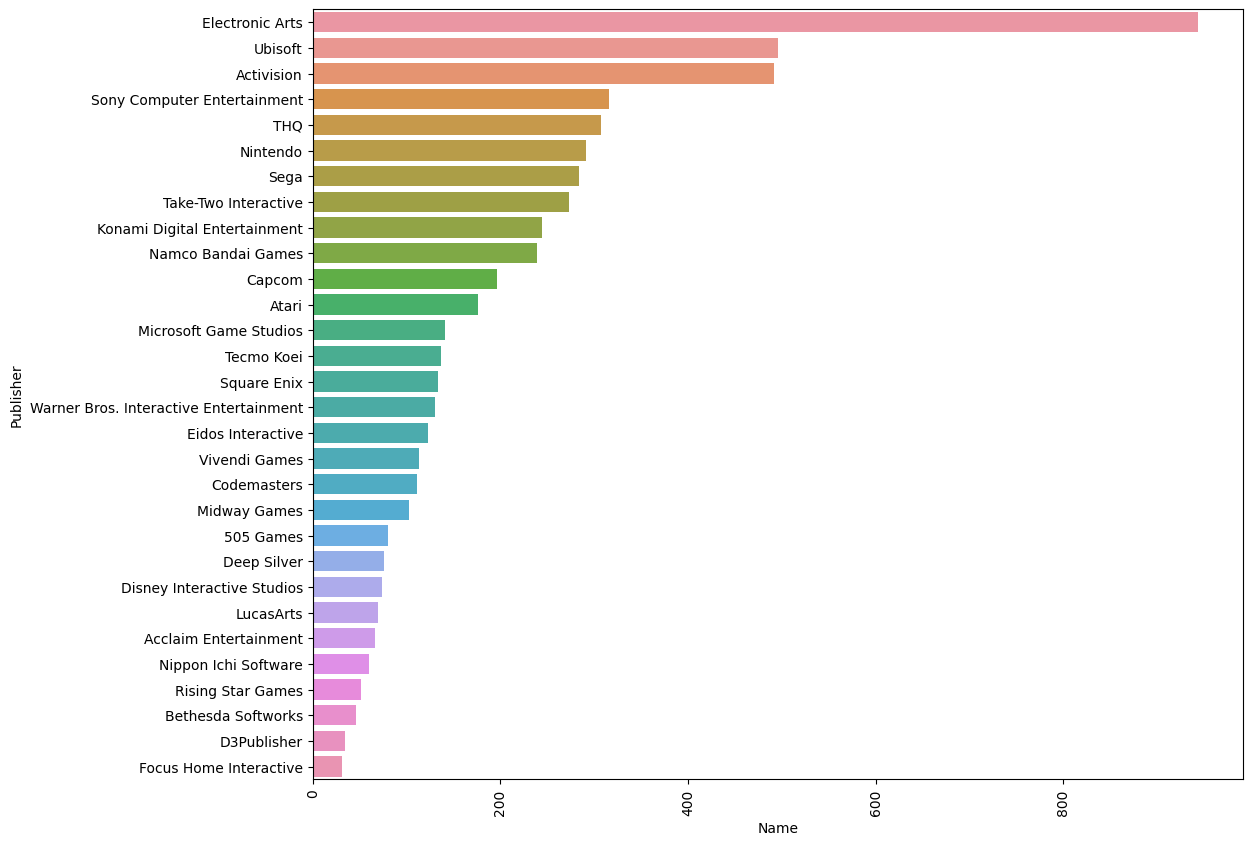

In [7]:
cols_to_use= ['Platform','Genre','Developer','Publisher']
for col in cols_to_use:
    plot = df[['Name', col]].groupby([col]).count().sort_values('Name',ascending=False).reset_index()
    plt.figure(figsize=(12,10))
    plt.xticks(rotation=90)
    ax =sns.barplot(x='Name',y=col,data=plot[:30])


#### Critic Score Distribtution by Genre, Platform, and Developer

In [8]:
df['Score_class'] = pd.qcut(df['Critic_Score'], q=3, labels=['Low','Average','High'])
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Score_class
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,Average
1,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,High
2,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,High
3,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,High
4,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,Low


In [9]:
df['Year_of_Release'] = df['Year_of_Release'].astype(int)

<AxesSubplot: xlabel='Score_class', ylabel='Genre'>

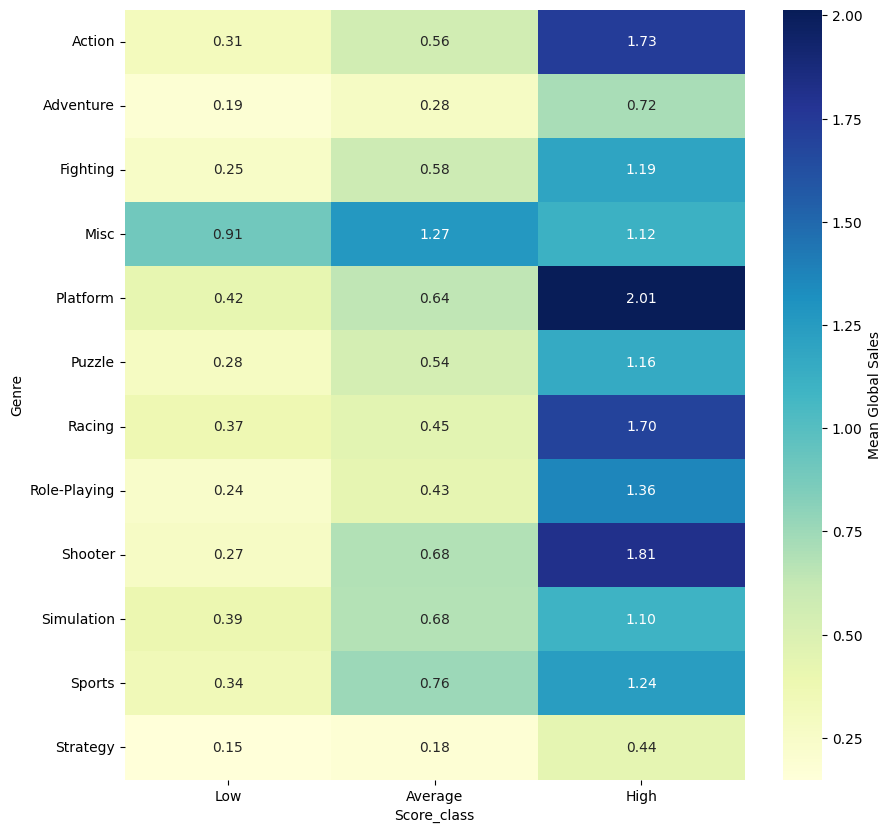

In [10]:
genre_scores =df[['Genre','Score_class','Critic_Score','Global_Sales']]
genre_scores = genre_scores.pivot_table(index='Genre', columns='Score_class',values='Global_Sales',aggfunc='mean')
genre_scores
plt.figure(figsize=(10,10))
sns.heatmap(genre_scores, cmap='YlGnBu', annot=True, fmt='.2f', cbar_kws={'label': 'Mean Global Sales'})


In [11]:
df_2 = df.copy()
df_2['Developer'].value_counts()

EA Canada                             149
EA Sports                             142
Capcom                                126
Ubisoft                               103
Konami                                 95
                                     ... 
Sanzaru Games, Sanzaru Games, Inc.      1
SCEA, Think and Feel                    1
Ubisoft Annecy                          1
Omega Force, Koei Canada                1
Atomic Games                            1
Name: Developer, Length: 1289, dtype: int64

In [12]:
df_2['Developer']

0                 Nintendo
1                 Nintendo
2                 Nintendo
3                 Nintendo
4                 Nintendo
               ...        
6820         Fluid Studios
6821       Criterion Games
6822    Kojima Productions
6823          Atomic Games
6824                SimBin
Name: Developer, Length: 6825, dtype: object

In [13]:
platform_scores = df[['Platform','Critic_Score','Global_Sales','Score_class']]
platform_scores = platform_scores.pivot_table(index='Platform',columns='Score_class', values='Global_Sales', aggfunc='mean')
platform_scores ### Dropping DC as has Null Values


Score_class,Low,Average,High
Platform,,,
3DS,0.393279,0.599355,1.940000
DC,NaN,NaN,0.325000
DS,0.314330,0.870455,1.788830
GBA,0.373649,0.448989,0.866757
GC,0.239009,0.431210,0.702832
PC,0.078279,0.172977,0.447070
PS,0.499773,0.657273,2.231096
PS2,0.393875,0.595921,1.767119
PS3,0.331047,0.676653,2.019316


In [14]:
platform_scores.dropna(inplace=True)

<AxesSubplot: xlabel='Score_class', ylabel='Platform'>

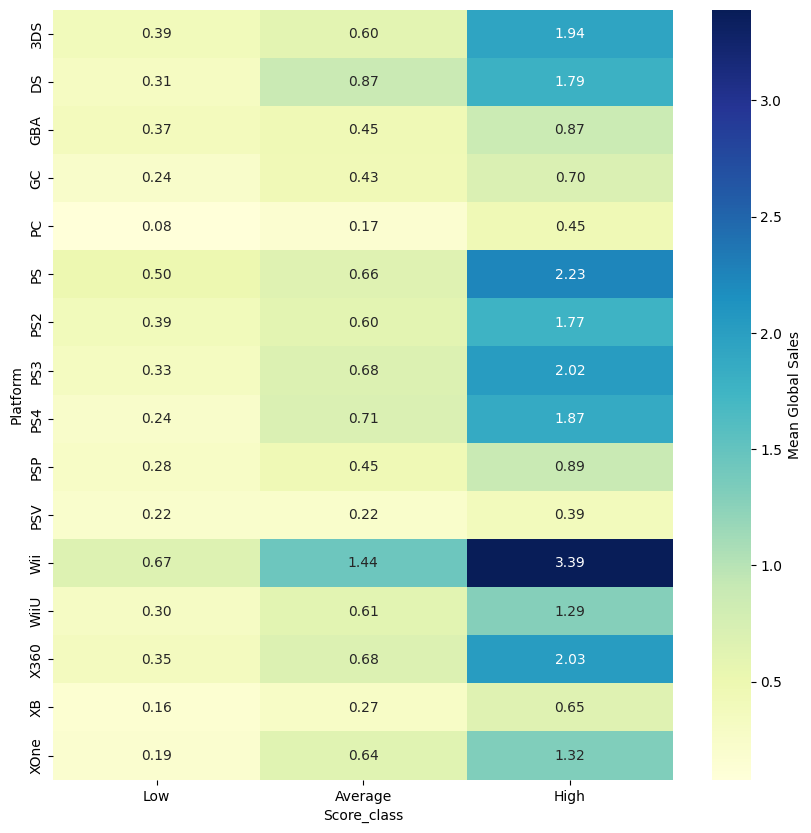

In [15]:
platform_scores
plt.figure(figsize=(10,10))
sns.heatmap(platform_scores,cmap='YlGnBu', annot=True, fmt='.2f', cbar_kws={'label': 'Mean Global Sales'})

Wii is the platform that has the most prominant global sales despite the Score class they receive, shadowed by 3DS, and the DS... Nintendo may have a chockhold on the sales market despite the score class... checking out Global Sales/Score Class for Developer

#### Dummy Label Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
def dummyEncode_column(column):
    le = LabelEncoder()
    df[f'{column.name}'] = le.fit_transform(df[f'{column.name}'])
    globals() [f'df_{column.name}_categories'] = list(le.classes_)
    
    print(f'After passing column ["{column.name}"] through LabelEncoder(): \n')
    
    for i in range(0,len(list(le.classes_))):
        print(f'Categorical value {le.inverse_transform([i])} is replaced with numerical value {[i]}')   
    
    print(f'\n[df_{column.name}_categories] = ', globals() [f'df_{column.name}_categories'])
    
    display(df)

In [18]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Score_class
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,Average
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,High
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,High
3,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,High
4,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,Low


In [19]:
dummyEncode_column(df['Genre'])

After passing column ["Genre"] through LabelEncoder(): 

Categorical value ['Action'] is replaced with numerical value [0]
Categorical value ['Adventure'] is replaced with numerical value [1]
Categorical value ['Fighting'] is replaced with numerical value [2]
Categorical value ['Misc'] is replaced with numerical value [3]
Categorical value ['Platform'] is replaced with numerical value [4]
Categorical value ['Puzzle'] is replaced with numerical value [5]
Categorical value ['Racing'] is replaced with numerical value [6]
Categorical value ['Role-Playing'] is replaced with numerical value [7]
Categorical value ['Shooter'] is replaced with numerical value [8]
Categorical value ['Simulation'] is replaced with numerical value [9]
Categorical value ['Sports'] is replaced with numerical value [10]
Categorical value ['Strategy'] is replaced with numerical value [11]

[df_Genre_categories] =  ['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle', 'Racing', 'Role-Playing', 'Shooter', 'S

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Score_class
0,Wii Sports,Wii,2006,10,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E,Average
1,Mario Kart Wii,Wii,2008,6,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,High
2,Wii Sports Resort,Wii,2009,10,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E,High
3,New Super Mario Bros.,DS,2006,4,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E,High
4,Wii Play,Wii,2006,3,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6820,E.T. The Extra-Terrestrial,GBA,2001,0,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E,Low
6821,Mortal Kombat: Deadly Alliance,GBA,2002,2,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M,High
6822,Metal Gear Solid V: Ground Zeroes,PC,2014,0,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M,High
6823,Breach,PC,2011,8,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T,Low


In [ ]:
numerical = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales','Critic_Score','Critic_Count','User_Count']

<AxesSubplot: >

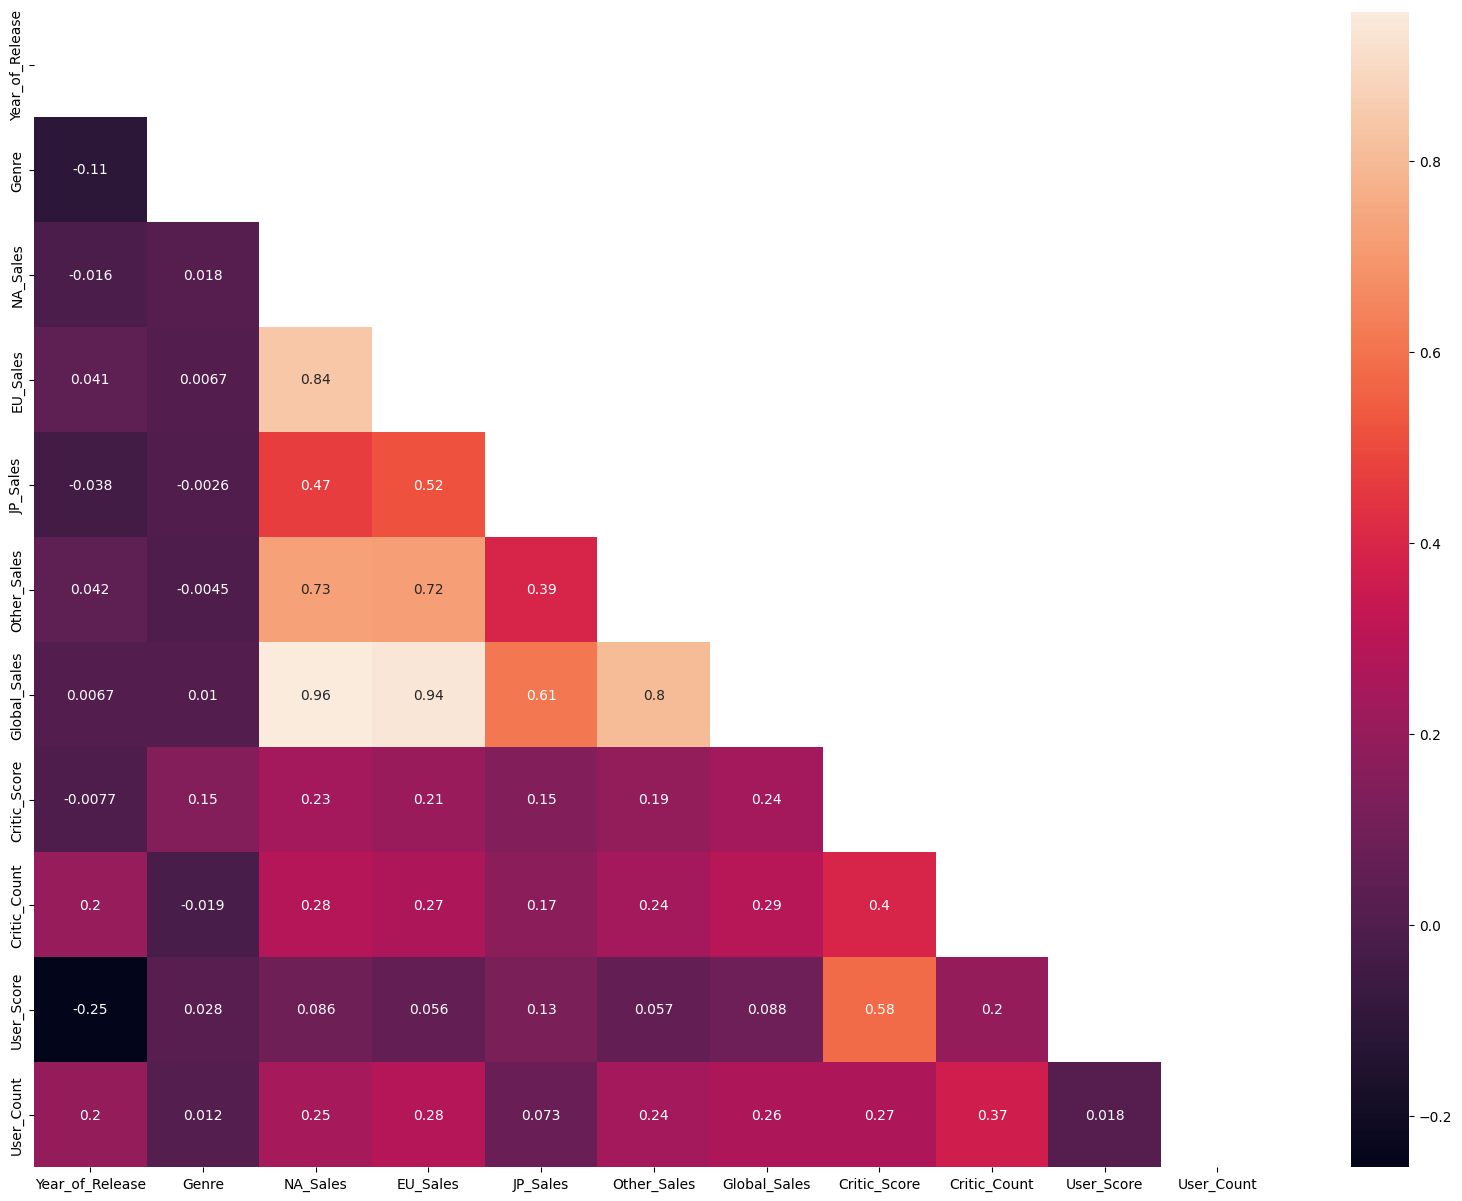

In [21]:
corr = df.corr()
plt.figure(figsize=(20,15))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(corr, annot=True,mask = mask, annot_kws={'size':10} )